# Maximal Margin Classifier using Hinge Loss

This notebook contains an implementation of the maximal margin classifier algorithm.
In traditional maximal margin classifier, one solves the constrained formulation

\begin{align*}
\min_{\mathbf{\beta}} \quad & \|\mathbf{\beta}\|^2 \\
\text{subject to} \quad & y(\mathbf{x}^{(i)})t^{(i)} \geq 1 
\end{align*}

where $y(\mathbf{x}^{(i)}) = \mathbf{\beta}^T\mathbf{x}^{(i)} + \beta_0$. We might sometimes want to use a softer unconstrained formulation. A choice would be to use the Hinge loss: 

\begin{align*}
\max(0, 1-t^{(i)}y(\mathbf{x}^{(i)})) = \max(0, 1-t^{(i)}(\mathbf{\beta}^T\mathbf{x}^{(i)}+\beta_0))
\end{align*}

For such a loss, we can derive a softer, unconstrained version of the problem as 

\begin{align*}
\min_{\mathbf{\beta}, \mathbf{\beta_0}} \quad & \|\mathbf{\beta}\|^2 + \frac{C}{N}\sum_{i=1}^N \max(0, 1-t^{(i)}(\mathbf{\beta}^T\mathbf{x}^{(i)}+\beta_0))
\end{align*}

The algorithm is implemented below and illustrated with a toy dataset.

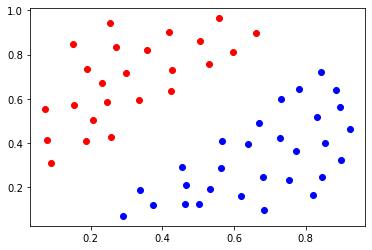

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
pointsClass1 = loadmat('KernelPointsEx4class1.mat')['PointsEx4class1']
pointsClass2 = loadmat('KernelPointsEx4class2.mat')['PointsEx4class2']


plt.scatter(pointsClass1[:,0], pointsClass1[:,1], c='r')
plt.scatter(pointsClass2[:,0], pointsClass2[:,1], c='b')
plt.show()

In [2]:
def HingeLoss(x, t, beta, beta0):
    
    '''Returns the value and gradient of the hinge loss at the point x'''
    '''The subgradient w.r.t. beta_j is -t*x_j if t*(beta.T @ x+beta0)<1 and 0 otherwise'''
    beta.reshape(-1,1)
    temp = float(1-t*(beta.T @ x.reshape(-1,1) + beta0))
    value = np.max([0,temp]) 
    
    gradient = []
    if temp >0:
        gradient.append(-t) # partial derivative w.r.t. beta0
        for j in range(len(x)):
            gradient.append(-t*x[j]) # partial derivatives w.r.t. beta
    else:
        for j in range(len(x)+1):
            gradient.append(0)
    return value, np.array(gradient)

In [3]:
def HingeLossSVC(beta_init, beta0_init, train_set, C):
    
    '''Returns the maximal margin classifier for the training dataset'''
    d = np.shape(train_set)[1]-1 # number of features
    X = train_set[:,:d]
    t = train_set[:,d]
    
    N = np.shape(X)[0] # number of data points
    MaxIter = 1000
    eta = 0.001 # learning rate
    beta0 = beta0_init
    beta = beta_init
    loss = np.zeros(MaxIter)
    # compute the gradient of the objective
    for k in range(MaxIter):
        grad = np.zeros(d+1)
        for i in range(N):
            loss_new, grad_new = HingeLoss(X[i], t[i], beta.reshape(-1,1), beta0) # get the lost and grad for this point
            grad = grad_new + grad
            loss[k] = loss[k]+loss_new
        grad = C/N * grad  
        grad[1:] = grad[1:] + 2*beta.flatten()
        # update beta's
        beta0 = beta0 - eta* grad[0]
        beta = beta - eta* grad[1:]
    return beta, beta0, np.array(loss)

In [4]:
# combine the datapoints into one matrix
N1 = np.shape(pointsClass1)[0] # number of points in class1
N2 = np.shape(pointsClass2)[0] # number of points in class2
data1 = np.hstack((pointsClass1, np.ones((N1,1)))) # label of class1 is 1
data2 = np.hstack((pointsClass2, -np.ones((N2,1)))) # label of class2 is -1
data  = np.vstack((data1, data2))

In [5]:
beta0 = np.random.normal(0,0.1) # initialize beta0
beta = np.random.normal(0,0.1,2) # initialize beta
beta, beta0, loss = HingeLossSVC(beta, beta0, data, 500) # compute the optimal parameters
print('beta0, beta = ', beta0, beta)

beta0, beta =  -0.04514937194049162 [-5.06345932  4.8371229 ]


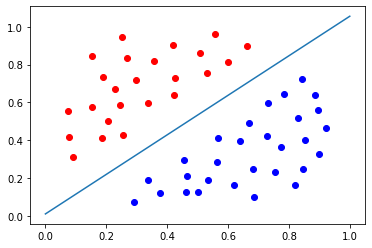

In [6]:
# display the decision boundary
plt.scatter(pointsClass1[:,0], pointsClass1[:,1], c='r')
plt.scatter(pointsClass2[:,0], pointsClass2[:,1], c='b')
x = np.linspace(0,1,100)
plt.plot(x, -(beta0+beta[0]*x)/beta[1]) # plot the decision boundary
plt.show()

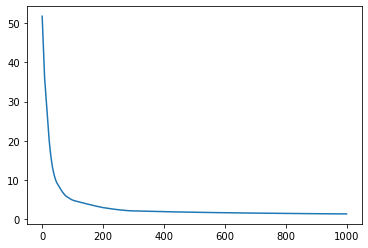

In [7]:
plt.plot(loss)